In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import io
import requests

%matplotlib inline

In [2]:
coronovirus_data = pd.read_csv("data/owid-covid-data.csv")

coronovirus_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


Посмотрим сколько данных в нашем датасете

In [3]:
coronovirus_data_shape = coronovirus_data.shape
coronovirus_data_shape

(79277, 59)

Посмотрим какие столбцы в данных вообще есть  
Описание каждого столбца тут https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv

In [16]:
coronovirus_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

Количество null значений в каждом столбце в процентном соотношении от общего числа строк

In [5]:
coronovirus_data.isnull().sum() / coronovirus_data_shape[0] * 100

iso_code                                  0.000000
continent                                 4.879095
location                                  0.000000
date                                      0.000000
total_cases                               1.990489
new_cases                                 1.993012
new_cases_smoothed                        3.255673
total_deaths                             13.884229
new_deaths                               13.684928
new_deaths_smoothed                       3.255673
total_cases_per_million                   2.522800
new_cases_per_million                     2.525323
new_cases_smoothed_per_million            3.781677
total_deaths_per_million                 14.400141
new_deaths_per_million                   14.200840
new_deaths_smoothed_per_million           3.781677
reproduction_rate                        19.464662
icu_patients                             89.526597
icu_patients_per_million                 89.526597
hosp_patients                  

In [6]:
null_table = coronovirus_data[coronovirus_data.continent.isnull()]
null_table

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
405,OWID_AFR,NaN,Africa,2020-02-13,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,OWID_AFR,NaN,Africa,2020-02-14,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
407,OWID_AFR,NaN,Africa,2020-02-15,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408,OWID_AFR,NaN,Africa,2020-02-16,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,OWID_AFR,NaN,Africa,2020-02-17,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78151,OWID_WRL,NaN,World,2021-03-30,128212983.0,568122.0,572512.000,2803397.0,11561.0,9872.286,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
78152,OWID_WRL,NaN,World,2021-03-31,128896025.0,683042.0,579538.143,2815659.0,12262.0,10243.286,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
78153,OWID_WRL,NaN,World,2021-04-01,129607651.0,711626.0,588170.000,2827520.0,11861.0,10296.714,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
78154,OWID_WRL,NaN,World,2021-04-02,130236504.0,628853.0,586405.429,2837709.0,10189.0,10011.143,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


In [7]:
null_table.location.unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'International',
       'North America', 'Oceania', 'South America', 'World'], dtype=object)

Сначала посчитаем общемировую зависимость количества твиттов от количество заболевших (всего в мире)  
Для этого выберем из наших данных такие строки, где location = World

In [65]:
world_stats = coronovirus_data[coronovirus_data.location == 'World']
world_stats.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
77718,OWID_WRL,NaN,World,22-01-2020,557.0,0.0,NaN,17.0,0.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
77719,OWID_WRL,NaN,World,23-01-2020,655.0,98.0,NaN,18.0,1.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
77720,OWID_WRL,NaN,World,24-01-2020,941.0,286.0,NaN,26.0,8.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
77721,OWID_WRL,NaN,World,25-01-2020,1433.0,492.0,NaN,42.0,16.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
77722,OWID_WRL,NaN,World,26-01-2020,2118.0,685.0,NaN,56.0,14.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


Теперь возьмём данные от твиттах

In [27]:
twitter_data = pd.read_csv("data/Corona_NLP_train.csv", encoding = "ISO-8859-1")
twitter_data.rename(columns={twitter_data.columns[3]: "date"}, inplace = True)
twitter_data.head(5)

,UserName,ScreenName,Location,date,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


Теперь подсчитаем количество твиттов каждый день

In [72]:
twitts = dict()
dates = list(twitter_data.date)

for date in dates:
    if twitts.get(date) is None:
        twitts[date] = 1
    else:
        twitts[date] += 1

Теперь по подсчитанным данным созданим новый датафрейм

In [77]:
count_of_twitts_per_day = pd.DataFrame()
count_of_twitts_per_day['date'] = twitts.keys()
count_of_twitts_per_day['count'] = twitts.values()
count_of_twitts_per_day.head()

,date,count
0,16-03-2020,656
1,17-03-2020,1977
2,18-03-2020,2742
3,19-03-2020,3215
4,20-03-2020,3448


Как мы видим даты в наших датасетах названы по разному, поэтому приведем их к общему виду

In [63]:
dates = list(coronovirus_data.date)
new_dates = []
for date in dates:
    l = date.split("-")
    l.reverse()
    new_dates.append("-".join(l))

coronovirus_data.drop(['date'], axis=1)
coronovirus_data['date'] = new_dates

Теперь как мы видим даты у нас схожие

In [66]:
world_stats.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
77718,OWID_WRL,NaN,World,22-01-2020,557.0,0.0,NaN,17.0,0.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
77719,OWID_WRL,NaN,World,23-01-2020,655.0,98.0,NaN,18.0,1.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
77720,OWID_WRL,NaN,World,24-01-2020,941.0,286.0,NaN,26.0,8.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
77721,OWID_WRL,NaN,World,25-01-2020,1433.0,492.0,NaN,42.0,16.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737
77722,OWID_WRL,NaN,World,26-01-2020,2118.0,685.0,NaN,56.0,14.0,NaN,...,15469.207,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737


Далее сделаем join наших таблиц

In [85]:
df = world_stats.merge(count_of_twitts_per_day, on='date', how='inner')
df.head(5)
df.shape[0]

30

In [86]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,count
0,OWID_WRL,NaN,World,16-03-2020,184027.0,14808.0,9972.571,7153.0,683.0,451.429,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,656
1,OWID_WRL,NaN,World,17-03-2020,199970.0,15943.0,11561.286,7966.0,813.0,528.429,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,1977
2,OWID_WRL,NaN,World,18-03-2020,219535.0,19565.0,13261.857,8872.0,906.0,608.714,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,2742
3,OWID_WRL,NaN,World,19-03-2020,246584.0,27049.0,16298.857,9983.0,1111.0,723.714,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,3215
4,OWID_WRL,NaN,World,20-03-2020,277359.0,30775.0,18640.429,11469.0,1486.0,865.000,...,10.0,233.07,8.51,6.434,34.635,60.13,2.705,72.58,0.737,3448


<AxesSubplot:>

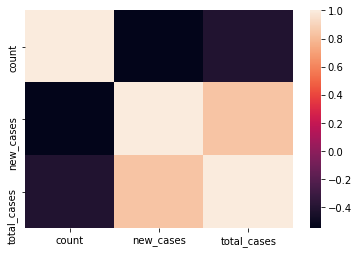

In [87]:
corr_data = df[['count', 'new_cases', 'total_cases']]
corr = corr_data.corr()
sns.heatmap(corr)

In [84]:
corr

,count,new_cases,total_cases
count,1.000000,-0.034335,-0.039137
new_cases,-0.034335,1.000000,0.920900
total_cases,-0.039137,0.920900,1.000000


Как мы видим коррелляции между количеством твиттев в день и количеством новых случаев не наблюдается  
Но корреляция между количеством новых случаев и общим числом случаев велика (что не удивительно)

Так же интересно посмотреть динамику новых случаев
Здесь мы можем наблюдать так называемые "волны" распространения короновируса

<AxesSubplot:>

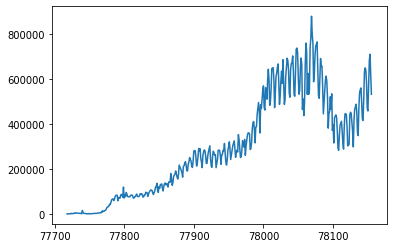

In [94]:
world_stats.new_cases.plot()

И всех случаев

<AxesSubplot:>

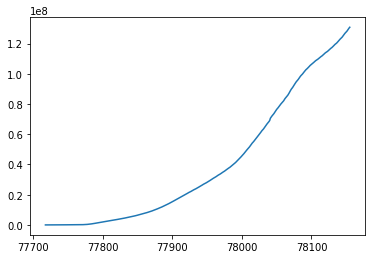

In [99]:
world_stats.total_cases.plot()

И динамику твиттов в день  
Как мы видим интерес к короновирусу сначала нарастает, потом достигает пика и падет, иногда снова повышаясь  
Из этого можно сделать вывод, что интерес к коронавирусу тоже волнообразен  
Но не коррелирует с количеством новых случаев
Потому что пик интереса пришёлся на момент, когда случаев было не так много, но вирус был в новинку

<AxesSubplot:>

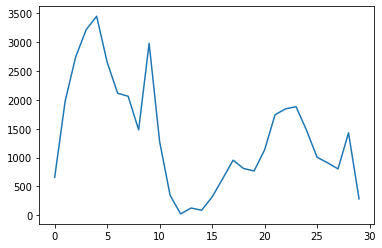

In [101]:
count_of_twitts_per_day['count'].plot()

Исходя из теста Колмогорова-Смирнова можно наблюдать схожую картину - распределения не идентичные

In [102]:
from scipy.stats import ks_2samp
ks_2samp(list(world_stats.new_cases), count_of_twitts_per_day['count'])

KstestResult(statistic=0.91324200913242, pvalue=7.771561172376096e-16)